# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


На основе данных Яндекс.Недвижимость поведем исследование рынка недвижимости в Санкт-Петербурге и соседних населённых пунктах за несколько лет. .
Цель исследования — проведение исследовательского анализа данных по ряду показателей:

- Изучить, как быстро продавались квартиры. Выявить среднюю продолжительность продажи. Определить какие продажи можно считать быстрыми, а какие — необычно долгими.
 
- Выявить факторы больше всего влияющие на стоимость объекта. 

- Расчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

- Вычислить как стоимость объектов зависит от расстояния до центра Санкт-Петербурга.

Данные о поведении пользователей получены из файла real_estate_data.csv. 

Исследование пройдёт в три этапа:
Обзор данных.
Предобработка данных.
Проведение исследовательского анализа данных

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# импортируем библиотеки и загрузим датасет
# рассмотрим первые 5 строк таблицы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Рассмотрим общую информацию о датасете

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


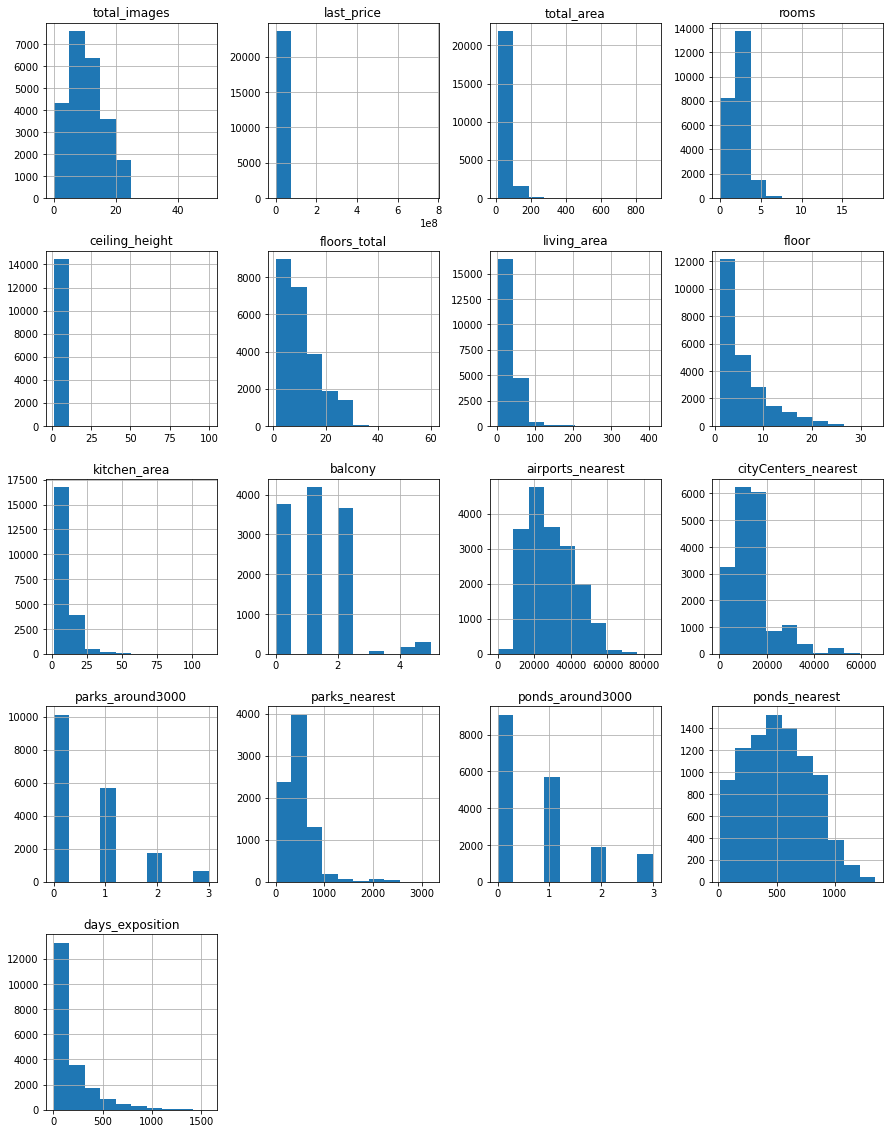

In [3]:
data.hist(figsize=(15, 20));

In [4]:
# Оценим полноту данных
mis_columns = data.columns[:21] 
print('Процент незаполненных ячеек в столбцах:')
print()
for mis_columns in data.columns:
    pct_missing = np.mean(data[mis_columns].isnull())
    if pct_missing != 0:
        
        print('{} - {}%'.format(mis_columns, round(pct_missing*100,2)))

Процент незаполненных ячеек в столбцах:

ceiling_height - 38.8%
floors_total - 0.36%
living_area - 8.03%
is_apartment - 88.29%
kitchen_area - 9.61%
balcony - 48.61%
locality_name - 0.21%
airports_nearest - 23.38%
cityCenters_nearest - 23.29%
parks_around3000 - 23.28%
parks_nearest - 65.91%
ponds_around3000 - 23.28%
ponds_nearest - 61.56%
days_exposition - 13.42%


In [5]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


В датасете 23 699 строк и 22 столбца. 
В нкоторых столбцах есть пропущенные значения и некорректный тип данных. Есть значения, которые могут оказаться аномальными и требуют дополнительной проверки. 


In [6]:
#чтобы избежать повторяющихся действий создадим функцию для описания столбцов
def description(column):
    print('наименование столбца:',column)
    print('тип данных:', data[column].dtypes)
    print('пропущенно значений:',data[column].isna().sum())
    if data[column].dtypes == 'object':
        print('уникальные значения:', '\n', data[column].value_counts())
    else:
        print('минимальное значение:',data[column].min())
        print('максимальное значение:', data[column].max())


### Предобработка данных

Произведем обработку данных

Переименуем колонки, чтобы привести их к единому виду

In [7]:
#переименование колонок (исправление стиля)
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'})

#проверим внесение изменений:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Изменим формат данных и заполним пропуски 0 там, где это возможно.

In [73]:
#переведем столбец с датой в формат даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [74]:
# Приводим в целочисленный тип стоимость квартиры
data['last_price'] = data['last_price'].astype(int)

In [75]:
# Приводим в целочисленный тип колличество этажей
# Заполним пропуски значениями из столбца floor
data['floors_total'] = data['floors_total'].fillna(data['floor']).astype(int)

In [76]:
# Заменим пропущенные значения на отрицание
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [77]:
# Заменим формат object на bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [78]:
# Приводим в целочисленный тип количество дней размещения объявления. Заменяем пропущенные значения на 0
data['days_exposition'] = data['days_exposition'].fillna(value=0).astype(int)

In [79]:
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

In [80]:
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0).astype(int)

In [81]:
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0).astype(int)

In [82]:
# Удаляем записи, где отсутствует название населенного пункта
data.dropna(subset=['locality_name'], inplace=True)

Применим функцию для описания ко всем столбцам, чтобы оценить пропущенные данные и выявить аномалии.

In [9]:
for i in data:
   description(i)
   print('*' * 10)

наименование столбца: total_images
тип данных: int64
пропущенно значений: 0
минимальное значение: 0
максимальное значение: 50
**********
наименование столбца: last_price
тип данных: int64
пропущенно значений: 0
минимальное значение: 12190
максимальное значение: 763000000
**********
наименование столбца: total_area
тип данных: float64
пропущенно значений: 0
минимальное значение: 12.0
максимальное значение: 900.0
**********
наименование столбца: first_day_exposition
тип данных: datetime64[ns]
пропущенно значений: 0
минимальное значение: 2014-11-27 00:00:00
максимальное значение: 2019-05-03 00:00:00
**********
наименование столбца: rooms
тип данных: int64
пропущенно значений: 0
минимальное значение: 0
максимальное значение: 19
**********
наименование столбца: ceiling_height
тип данных: float64
пропущенно значений: 9160
минимальное значение: 1.0
максимальное значение: 100.0
**********
наименование столбца: floors_total
тип данных: int64
пропущенно значений: 0
минимальное значение: 1
максим

В столбце last_price аномально низкое минимальное значение 12190, вероятно цена записанна в тыс. руб.

In [10]:
data.loc[(data['last_price']<1000000)& (data['locality_name']=='Санкт-Петербург' )]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8


In [11]:
data.loc[8793, 'last_price'] = 12190000
data.loc[(data['last_price']<1000000)& (data['locality_name']=='Санкт-Петербург' )]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


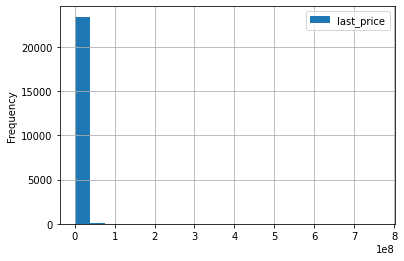

In [12]:
data.plot(y = 'last_price', kind = 'hist', bins = 20, grid = True);

В столбце rooms минимальный показатель равен 0. Вероятно так обозначены студии и квартиры с открытой планировкой. Проверим данную гипотезу.

In [13]:
data.loc[(data['rooms']== 0)&((data['studio']== True)|(data['open_plan']== True))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181
349,4,2320000,25.00,2017-09-27,0,NaN,14,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45
440,8,2480000,27.11,2018-03-12,0,NaN,17,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64
508,0,3375000,34.40,2017-03-28,0,NaN,26,24.30,19,False,...,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430
608,2,1850000,25.00,2019-02-20,0,NaN,10,NaN,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,NaN,25,18.00,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14
23442,0,2500000,27.70,2017-09-28,0,NaN,24,18.00,4,False,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4
23554,15,3350000,26.00,2018-09-07,0,NaN,19,NaN,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31
23592,10,1450000,29.00,2017-11-11,0,NaN,9,18.00,8,False,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82


Действительно все О показатели относятся к кравтирам-студиям или к открытой планировке. Но, действует ли это правило в обратном случае?

In [14]:
data.groupby('studio')['rooms'].value_counts()

studio  rooms
False   1        8025
        2        7924
        3        5797
        4        1175
        5         326
        6         105
        0          59
        7          59
        8          12
        9           8
        10          3
        11          2
        14          2
        12          1
        15          1
        16          1
        19          1
True    0         138
        1          11
Name: rooms, dtype: int64

Видим, что у 11 квартир указанно колличество комнат равное 1. Для единообразия - заменим этот показатель на 0.

In [15]:
data.loc[(data['rooms'] == 1) & (data['studio']==True),'rooms'] = 0
# проверка
data.query('studio == True')['rooms'].value_counts()

0    149
Name: rooms, dtype: int64

In [16]:
data.groupby('open_plan')['rooms'].value_counts()

open_plan  rooms
False      1        8022
           2        7923
           3        5795
           4        1174
           5         325
           0         149
           6         105
           7          59
           8          12
           9           8
           10          3
           11          2
           14          2
           12          1
           15          1
           16          1
           19          1
True       0          59
           1           3
           3           2
           2           1
           4           1
           5           1
Name: rooms, dtype: int64

Открытая планировка не предполагает наличие комнат, однако вы видим несколько аномалий. Заменим эти показатели на 0.

In [17]:
data.loc[(data['open_plan']==True),'rooms'] = 0
# проверка
data.query('open_plan == True')['rooms'].value_counts()

0    67
Name: rooms, dtype: int64

Данные о колличестве комнат приведены к единому виду.

Столбец: **ceiling_height** высота потолков в м

In [18]:
description('ceiling_height')

наименование столбца: ceiling_height
тип данных: float64
пропущенно значений: 9160
минимальное значение: 1.0
максимальное значение: 100.0


In [19]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Потолки высотой от 25 до 100 метров, скорее всего являются ошибочно записанными данными. Т.к. средняя высота потолков жилых помещений не превышает 6 метров. Разделим такие показатели на 10.

In [20]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = (
    data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10
)

Заменим пропущенные значения средними показателями в зависимотсти от площади квартиры

In [21]:
median_height=data['ceiling_height'].median()
data['ceiling_height'].fillna(median_height,inplace=True)

In [22]:
for value in data['living_area'].unique():
        median_c = data.loc[data['living_area']== value, 'ceiling_height'].median()
        if median_c > 0:
            data.loc[(data['ceiling_height'].isna()) & (data['living_area']==value), 'ceiling_height'] = median_c
        else:
            data.loc[(data['ceiling_height'].isna()) & (data['living_area']==value), 'ceiling_height'] = data['ceiling_height'].mean()
# для значений по которым не удалось расчитать медиану - зададим среднее значение

In [23]:
data['ceiling_height']= np.round(data['ceiling_height'], decimals=2)
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

Заполним пропуски в столбце living_area (жилая площадь) медианными показателями в зависимости от колличества комнат.

In [24]:
for value in data['rooms'].unique():
    median_l = data.loc[data['rooms']== value, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms']==value), 'living_area'] = median_l

Заполним пропуски в столбце kitchen_area (площадь кухни) в зависимости от колличества комнат.

In [25]:
for value in data['rooms'].unique():
    median_k = data.loc[data['rooms']== value, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms']==value), 'kitchen_area'] = median_k

Выявим не явные дубликаты в наименованиях населенных пунктов

In [26]:
print('Уникальные наименования до унификации:',len(data['locality_name'].unique()))

box = ['посёлок', 'городской поселок','поселок городского типа','городской','деревня','садовое товарищество',
       'городского типа','поселок станции','поселок','садоводческое некоммерческое товарищество','село',
      'коттеджный','при железнодорожной станции','станции']
for i in box:
    data['locality_name'] = data['locality_name'].str.replace(i, '') 
data['locality_name'] = data['locality_name'].str.strip()    
print('Уникальные наименования после унификации:',len(data['locality_name'].unique()))

Уникальные наименования до унификации: 364
Уникальные наименования после унификации: 305


In [27]:
print(data['locality_name'].sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Вещево'
 'Виллози' 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово'
 'Володарское' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица'
 'Выскатка' 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина'
 'Гладкое' 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки'
 'Гостилицы' 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье'
 'Дубровка' 'Елизаветино' 'Ефимовский' 'Жил' 'Жилгородок' 'Житково'
 'Заводской' 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы'
 'Ивангород' 'Извара' 'Ильичёво' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 'Кипень

Проверим датасет на наличие дубликатов.

In [28]:
data.duplicated().sum()

0

### Расчитаем и добавим в таблицу новые столбцы

Расчитаем цену одного квадратного метра

In [29]:
data['metr_price'] = data['last_price'] / data['total_area']
data['metr_price'] = data['metr_price'].astype(int)
description('metr_price')

наименование столбца: metr_price
тип данных: int64
пропущенно значений: 0
минимальное значение: 7962
максимальное значение: 1907500


Добавим столбец с обозначениями денней публикации объявлений (0 - понедельник, 1 - вторник и т.д.)

In [30]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday

In [31]:
data['day_of_week'].value_counts()

3    4286
1    4175
4    3992
2    3966
0    3606
5    1933
6    1692
Name: day_of_week, dtype: int64

Добавим столбец с месяцем и годом публикации объявления

In [32]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Добавим столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [33]:
def number_floor(column):
    if column['floor'] == 1:
        return 'первый'
    elif column['floor'] == column['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['number_floor'] = data.apply(number_floor, axis=1)    

In [34]:
data['number_floor'].value_counts()

другой       17326
последний     3412
первый        2912
Name: number_floor, dtype: int64

Добавим столбец с расстоянием в км до центра города

Для этого разделим данные из столбца data['city_centers_nearest'] заданный в метрах на 1000. 

In [35]:
data['city_centers_km']= (data['city_centers_nearest']/1000)
data['city_centers_km'].unique()

array([16.028, 18.603, 13.933, ..., 27.977,  7.262,  6.263])

### Проведем исследовательский анализ данных

Рассмотрим следующие параметры:

        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления

Вначале оценим показатели связанные с площадью квартир (total_area,living_area,kitchen_area)

In [36]:
#еще раз рассмотрим общую информацию
description('total_area')
print('-'* 30)
description('living_area')
print('-'* 30)
description('kitchen_area')

наименование столбца: total_area
тип данных: float64
пропущенно значений: 0
минимальное значение: 12.0
максимальное значение: 900.0
------------------------------
наименование столбца: living_area
тип данных: float64
пропущенно значений: 0
минимальное значение: 2.0
максимальное значение: 409.7
------------------------------
наименование столбца: kitchen_area
тип данных: float64
пропущенно значений: 216
минимальное значение: 1.3
максимальное значение: 112.0


Пропущенные значения в описании кухонной площади можно объяснить наличием квартир-студий и объектов без планировки.

Простороим гиксограммы

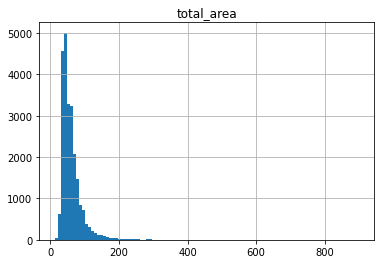

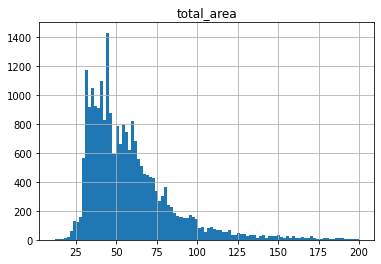

In [37]:
# рассмотрим общую площадь
data.hist('total_area', bins=100, range=(12,900));
# видим, что большиество квартир находятся в группе до 200 кв. м. и укрупним это на отдельном графике
data.hist('total_area', bins=100, range=(12,200));

Обратим внимание, что квартиры площадбю меньше 25 кв и больше 100 кв - составляют малую часть нашей выборки. Больше всего продается квартир площадью 45-65 кв. м.

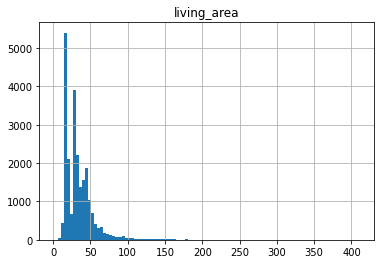

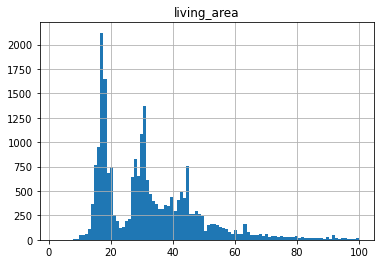

In [38]:
#рассмотрим общую жилую площадь
data.hist('living_area', bins=100, range=(2,410));
#укрупним график
data.hist('living_area', bins=100, range=(2,100));

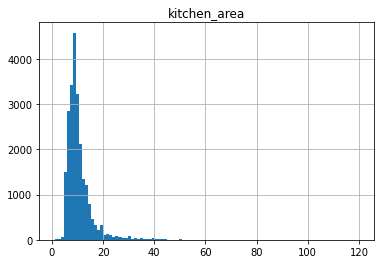

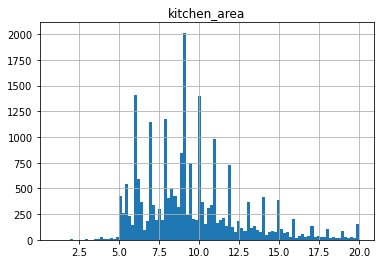

In [39]:
#рассмотрим площадь кухонь
data.hist('kitchen_area', bins=100, range=(1,120));
#укрупним график
data.hist('kitchen_area', bins=100, range=(1,20));

Чаще всего мы видим кухни в диапазоне от 5 до 12 кв.м.

Рассмотрим параметр - цена объекта (last_price)

наименование столбца: last_price
тип данных: int64
пропущенно значений: 0
минимальное значение: 430000
максимальное значение: 763000000
медианное значение: 4650000.0


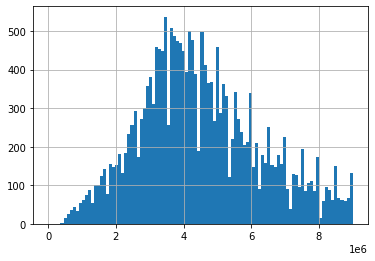

In [40]:
description('last_price')
print('медианное значение:',data['last_price'].median())
data['last_price'].hist(bins=100,range=(0,9000000));

Максимальная цена квартиры  763 000 000 руб. Большая часть квартир значительно дешевле этой суммы. Медианное значение составляет 4 650 000. Большая часть квартир стоит в диапазоне от 3 до 7 миллионов.

Рассмотрим показательно - количество комнат(rooms)
   

наименование столбца: rooms
тип данных: int64
пропущенно значений: 0
минимальное значение: 0
максимальное значение: 19
медианное значение: 2.0


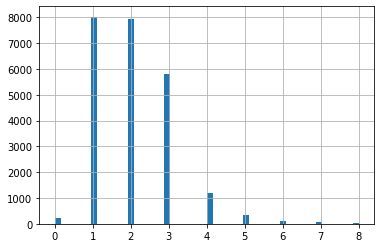

In [41]:
description('rooms')
print('медианное значение:',data['rooms'].median())
data['rooms'].hist(bins=50,range=(0,8));

Максимальное колличество комнат - 19, но это очень редкое значение. Больше всего квартир 1-3 комнатные. Как мы выяснили раньше, квартиры с 0 комнат - это студии и помещения с открытой планировкой.

Рассмотрим показатель - высота потолков(ceiling_height)

наименование столбца: ceiling_height
тип данных: float64
пропущенно значений: 0
минимальное значение: 1.0
максимальное значение: 10.0
медианное значение: 2.65


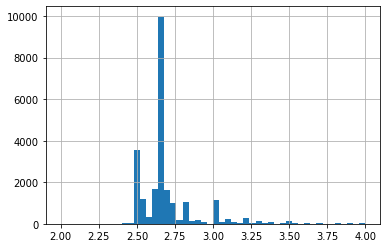

In [42]:
description('ceiling_height')
print('медианное значение:',data['ceiling_height'].median())
data['ceiling_height'].hist(bins=50,range=(2,4));

У большенства квартир высота потолка варьируется от 2,5 до 3 метров.

Рассмотрим показатели - этаж квартиры (floor),тип этажа квартиры (number_floor) и общее количество этажей в доме(floors_total)

In [54]:
#еще раз рассмотрим общую информацию
description('floors_total')
print('медианное значение:',data['floors_total'].median())
print('-'* 30)
description('floor')
print('медианное значение:',data['floor'].median())
print('-'* 30)
description('number_floor')

наименование столбца: floors_total
тип данных: int64
пропущенно значений: 0
минимальное значение: 1
максимальное значение: 60
медианное значение: 9.0
------------------------------
наименование столбца: floor
тип данных: int64
пропущенно значений: 0
минимальное значение: 1
максимальное значение: 33
медианное значение: 4.0
------------------------------
наименование столбца: number_floor
тип данных: object
пропущенно значений: 0
уникальные значения: 
 другой       17326
последний     3412
первый        2912
Name: number_floor, dtype: int64


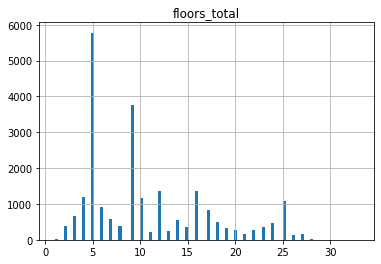

In [59]:
#рассмотрим общую этажность домов
data.hist('floors_total', bins=100, range=(1,33));

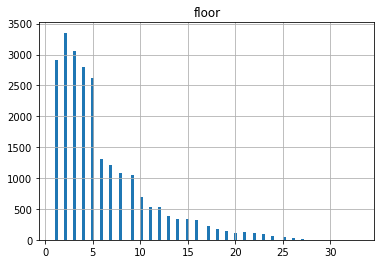

In [57]:
#рассмотрим этажи расположения квартир
data.hist('floor', bins=100, range=(1,33));

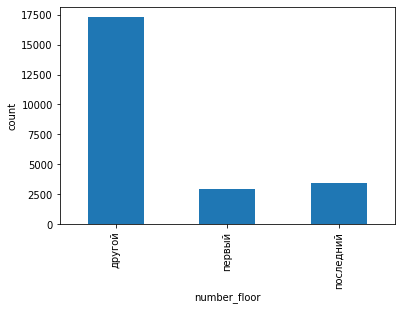

In [58]:
#рассмотрим распределение квартир по высотности этажа
data.groupby(by='number_floor')['number_floor'].count().plot(kind='bar', ylabel = 'count');

Не смотря на то, что в детесете представлены дома до 60 этажей в высоту, самое высокое расположение квартиры - 33 этаж. Большая часть квартир расположенна в районе 2-4 этажей.

Рассмотрим показатели - расстояния до центра города в метрах (city_centers_nearest),до ближайшего аэропорта (airports_nearest) и до ближайшего парка(parks_nearest)

In [61]:
#еще раз рассмотрим общую информацию
description('city_centers_nearest')
print('медианное значение:',data['city_centers_nearest'].median())
print('-'* 30)
description('airports_nearest')
print('медианное значение:',data['airports_nearest'].median())
print('-'* 30)
description('parks_nearest')
print('медианное значение:',data['parks_nearest'].median())

наименование столбца: city_centers_nearest
тип данных: float64
пропущенно значений: 5511
минимальное значение: 181.0
максимальное значение: 65968.0
медианное значение: 13105.0
------------------------------
наименование столбца: airports_nearest
тип данных: float64
пропущенно значений: 5534
минимальное значение: 0.0
максимальное значение: 84869.0
медианное значение: 26756.5
------------------------------
наименование столбца: parks_nearest
тип данных: float64
пропущенно значений: 15586
минимальное значение: 1.0
максимальное значение: 3190.0
медианное значение: 454.5


Пропущенные значенияобзанают отсутствие объектов рядом с домами.

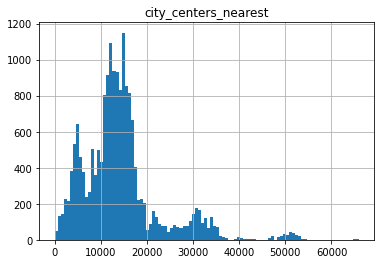

In [64]:
#рассмотрим растояния до центра города
data.hist('city_centers_nearest', bins=100, range=(0,65968));

Большенство квартир расположено на расстоянии 10-15 км от центра

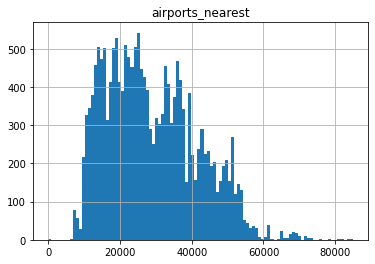

In [65]:
#рассмотрим растояния до ближайщего аэропорта
data.hist('airports_nearest', bins=100, range=(0,84869));

Большенство квартир расположено на расстоянии 26 -40 км от ближайшего аэропорта

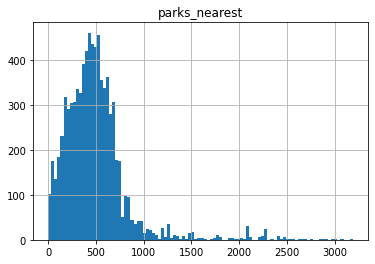

In [66]:
#рассмотрим растояния до ближайщего парка
data.hist('parks_nearest', bins=100, range=(1,3190));

Большенство квартир расположено на расстоянии 500 метров от ближайшего парка

Рассмотрим показатели - день (day_of_week) и месяц (month_exposition) публикации объявления 

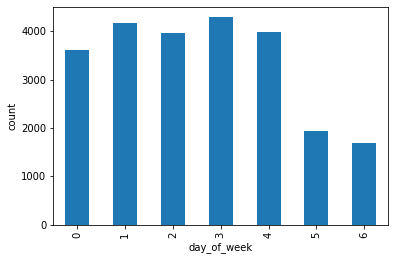

In [69]:
#рассмотрим колличество размещений публикаций по дням недели, где 0 - воскресение
data.groupby(by='day_of_week')['day_of_week'].count().plot(kind='bar', ylabel = 'count');

Больше всего объявлений было закрыто в пондельник и среду

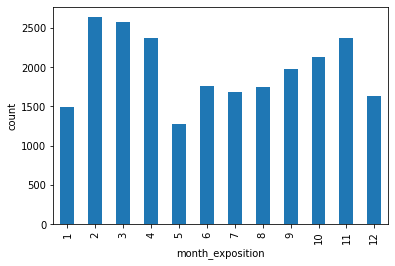

In [71]:
#рассмотрим колличество публикаций по месяцам
data.groupby(by='month_exposition')['month_exposition'].count().plot(kind='bar', ylabel = 'count');

Наиболее активным был период с февраля по апрель.

Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

In [126]:
data['days_exposition'].value_counts()

0       3180
45       879
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

Минимальное значение равное 0, означает, что объявление еще не снято с публикации, а значит такие квартиры нас не интересуют.

In [127]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Построим диаграмму размаха

(1.0, 1580.0)

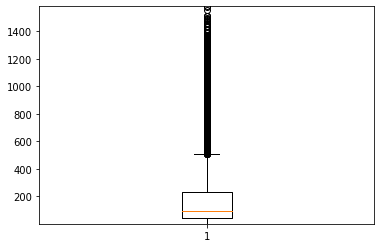

In [128]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition']);
plt.ylim(1,1580)

Построим гигсограмму

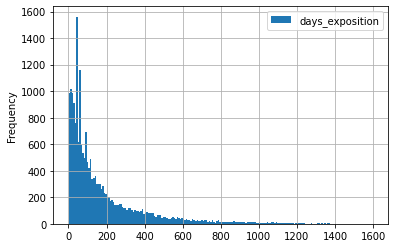

In [129]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 200, grid = True, range = (1,1600));

Среднее значение - 156 дней, а медиана - 73 дня. Отдельно выделяются пиковые значения.
Укрупним гиксограмму, чтобы посмотреть точнее.

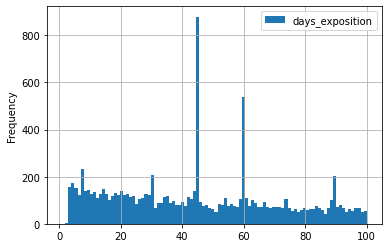

In [130]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,100));

Пиковые значения закрытия объявлений приходятся на 45 и 60 дней. Возможно это связанно с правилами размещения на рекламной площадке. Максимально быстрыми можно считать продажи до 40 дней. Аномально долгими - более 600 дней.

Выявим какие факторы больше всего влияют на общую (полную) стоимость объекта. 


Рассмотрим зависимость цены от площади и расчитаем коэффициент корреляции.

Коффициент корреляции стоимости квартиры от общей площади: 0.6538086421356285
Коффициент корреляции стоимости квартиры от жилой площади: 0.5556641980291505
Коффициент корреляции стоимости квартиры от площади кухни: 0.4543502120024453


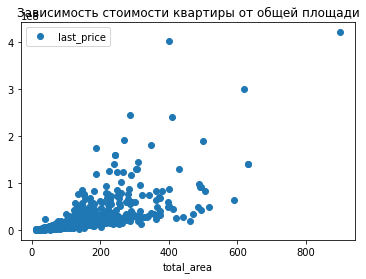

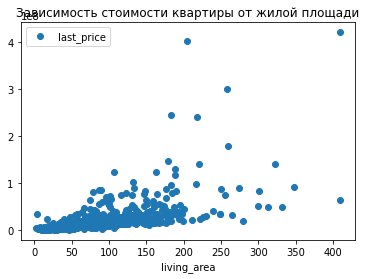

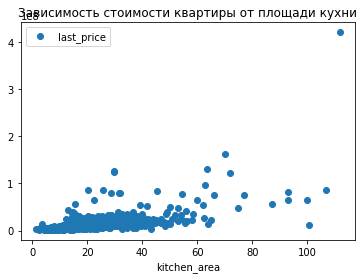

In [131]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
pivot_table_total_area.plot(y = 'median', style = 'o', title='Зависимость стоимости квартиры от общей площади')

print('Коффициент корреляции стоимости квартиры от общей площади:',data['total_area'].corr(data['last_price']))

pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
pivot_table_living_area.plot(y = 'median', style = 'o', title='Зависимость стоимости квартиры от жилой площади')

print('Коффициент корреляции стоимости квартиры от жилой площади:',data['living_area'].corr(data['last_price']))

pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
pivot_table_kitchen_area.plot(y = 'median', style = 'o', title='Зависимость стоимости квартиры от площади кухни')

print('Коффициент корреляции стоимости квартиры от площади кухни:',data['kitchen_area'].corr(data['last_price']))

Наиболее выраженная зависимоть наблюдается между ростом цены и увеличением общей площади квартиры.

 Рассмотрим зависимость стоимости квартир от типа этажа расположения и колличества комнат.

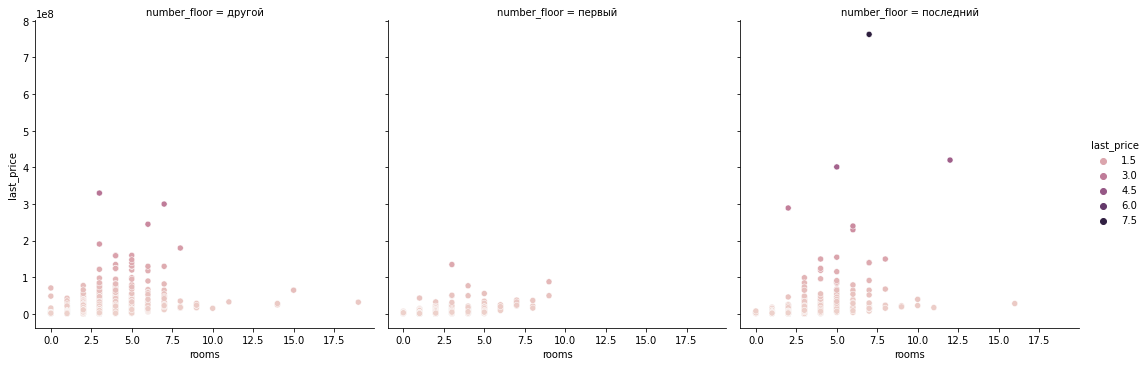

In [132]:
sns.relplot(
    data=data,
    x='rooms',
    y='last_price',
    col='number_floor',
    hue='last_price');

Стоимтость квартир ростет с увелиением комнат до 5, а затем идет на спад. Цены на квартиры расположенные выше первого этажа - выше.

 Рассмотрим зависимость стоимости квартир от даты размещения объявления (день недели, месяц, год);

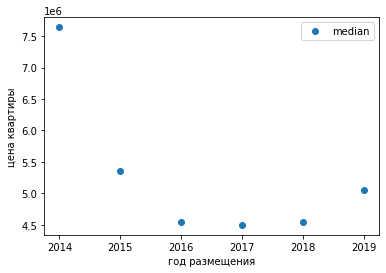

In [133]:
pivot_year = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median'])
pivot_year.columns = ['median']
pivot_year.plot(y='median',style = 'o', by='year_exposition').set(xlabel='год размещения', ylabel='цена квартиры');

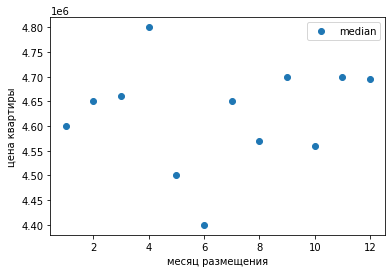

In [134]:
pivot_month = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median'])
pivot_month.columns = ['median']
pivot_month.plot(y='median',style = 'o', by='month_exposition').set(xlabel='месяц размещения', ylabel='цена квартиры');

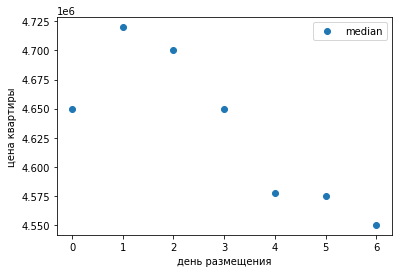

In [135]:
pivot_day = data.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = ['median'])
pivot_day.columns = ['median']
pivot_day.plot(y='median',style = 'o', by='day_of_week').set(xlabel='день размещения', ylabel='цена квартиры');

Зависимость от года, месяца и дня недели публикации.
    
    Год: можно отметить спад цен на квартиры в 2017,сменившийся плавным ростом в плоть до 2019 года. 
    Месяц: самая высокая цена продажи квартив в апреле, низкая - в июне.
    День недели: самая высокая цена продажи квартир в понедельник и вторник. Можно наблюдать снижение стоимости вплоть до субботы(самый низкий показатель).



In [136]:
print('Коффициент корреляции стоимости квартиры к году размещения:',data['year_exposition'].corr(data['last_price']))
print('Коффициент корреляции стоимости квартиры к месяцу размещения:',data['month_exposition'].corr(data['last_price']))
print('Коффициент корреляции стоимости квартиры ко дню недели размещения:',data['day_of_week'].corr(data['last_price']))

Коффициент корреляции стоимости квартиры к году размещения: -0.04285290978026242
Коффициент корреляции стоимости квартиры к месяцу размещения: 0.002694992983982155
Коффициент корреляции стоимости квартиры ко дню недели размещения: 0.0015918399886516398


Корреляция между стоимостью продажи квартиры и показателсями времени продажи - отсутсвует.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [137]:
top_city = data['locality_name'].value_counts().head(10)

dtmt=(
    data.query('locality_name in (@top_city.index)')
    .pivot_table(values='metr_price', index='locality_name')
    .astype(int)
    .sort_values('metr_price', ascending=False)
)
dtmt

,metr_price
locality_name,
Санкт-Петербург,114855
Пушкин,103125
Кудрово,95324
Парголово,90175
Мурино,86087
Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


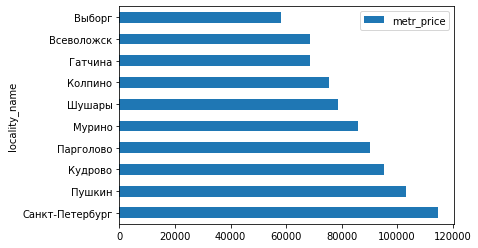

In [138]:
dtmt.plot(kind='barh');

In [139]:
top_city_min = data['locality_name'].value_counts().tail(10)

dtm=(
    data.query('locality_name in (@top_city_min.index)')
    .pivot_table(values='metr_price', index='locality_name')
    .astype(int)
    .sort_values('metr_price', ascending=True)
    
)

dtm

,metr_price
locality_name,
Сижно,13709
Шугозеро,16608
Ялгино,17659
Пельгора,18269
Кондратьево,25000
Пчева,26829
Ропша,36111
Кивеннапа Север,36363
Терпилицы,38025


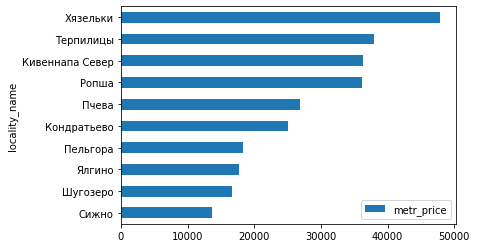

In [140]:
dtm.plot(kind='barh');

Самая высокая стоимость квадратного метра в Санкт-Петербурге (114 855), а самая низкая в Сижно (13 709)

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

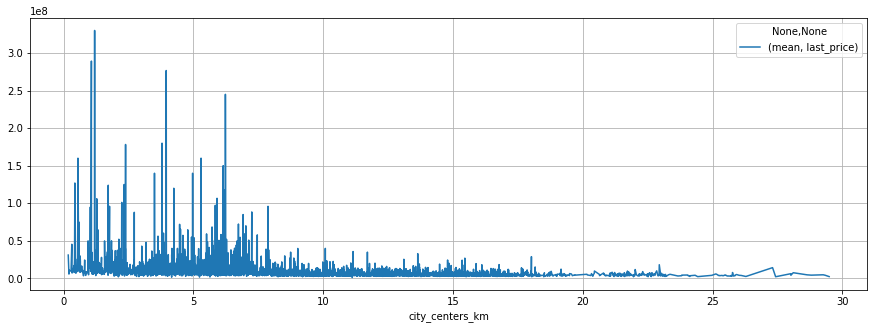

In [141]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_km', values='last_price', aggfunc = ['mean'])
    .plot(grid=True,  figsize=(15, 5))
);

In [142]:
data['city_centers_km'] = data['city_centers_km'].fillna(value=0).astype(int)

pivot_city_centers_km = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_km', values='last_price', aggfunc = ['mean'])
    
)
pivot_city_centers_km = pivot_city_centers_km.astype(int)
pivot_city_centers_km

,mean
,last_price
city_centers_km,
0,20226732
1,18850851
2,16163313
3,13436830
4,13632024
5,15306121
6,14389106
7,12797673


Предсказуемо, средняя стоимость жилья в центре самая высокая. Существенное снижение наблюдается в радиусе 5 километров. Далее продолжается плавное падение цены, с небольшим всплеском в районе 27 киллометра. Вероятно в этом районе нахдится микрорайон с элитной недвижимостью.

### Общий вывод

    В ходе исследования был изучен датасет содержащий 23 699 строк и 22 столбца. Были проанализированны и заполненны, там где это возможно, пропущенные значения. Типы данных столбцов были приведены к удобному для анализа виду.  Были выявленны аномальные значения. В таблицу были добавленны столбцы с ценой квадратного метра жилья,  дни недели, месяцы и года размещения объявлений, а также  категории по этажам квартир. 
    Пиковые значения закрытия объявлений приходятся на 45 и 60 дней. Возможно это связанно с правилами размещения на рекламной площадке. Максимально быстрыми можно считать продажи до 40 дней. Аномально долгими - более 600 дней.
    Наиболее выраженная зависимоть наблюдается между ростом цены и увеличением общей площади квартиры.
    Стоимтость квартир ростет с увелиением колличеества комнат до 5, а затем идет на спад.
    Квартиры расположенные на первом этаже в среднем дешевле остальных.
    Корреляция между стоимостью продажи квартиры и показателсями времени продажи - отсутсвует. Можно отметить спад цен на квартиры в 2017,сменившийся плавным ростом в плоть до 2019 года. 
    Самая высокая стоимость квадратного метра в Санкт-Петербурге (114 855), а самая низкая в Сижно (13 709).
    Можно отметить резкий спад стоимости жилья в Санкт-Петербурге,в радиусе 5 километров.Именно этим радиусом можно условно очертить центр города. Далее продолжается плавное падение цены, с небольшим всплеском в районе 27 киллометра. Вероятно в этом районе нахдится микрорайон с элитной недвижимостью.